Sentimen Hasil Debat Pemilu


Analisis Sentimen Debat Capres Pertama

1. Cleaning Data
2. Preprocessing
    - normalisasi
    - stopword
    - tokenize
    - Stemming
3. Translate
4. Labeling
5. Visualisasi
6. Klasifikasi Sentimen


In [32]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("anies.csv")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...


In [34]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [35]:
df.shape

(515, 3)

In [36]:
df = df.drop_duplicates(subset=['full_text'])

In [37]:
df.duplicated().sum()

0

In [38]:
df = df.dropna()

In [39]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [40]:
df.shape

(508, 3)

In [41]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?://\S+','',text)
    text = re.sub(r'[^A-Za-z0-9 ]','',text)
    text = re.sub(r'\s+',' ',text).strip()
    
    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [42]:
df['full_text'] = df['full_text'].str.lower()

2. Preprocessing
    - normalisasi
    - stopword
    - tokenize
    - Stemming

In [43]:
# Normalisasi
norm = {
        " yg ": " yang ",
        " ganjar ": "", 
        " prabowo ": "", 
        "nggak" : "tidak", 
        "gak":"tidak",
        "bangetdari" : "banget dari",
        "vibes" : "suasana",
        "pastilahanies" : "pastilah anis"
        }

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x : normalisasi(x))
df

,full_text,username,created_at
0,pastilah anis tidak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yang disampaikam an...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yang kd ...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [44]:
!pip install Sastrawi

In [45]:
# Stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,pastilah anis punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023


In [46]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0                      [pastilah, anis, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikam, a...
512    [buat, pak, anies, bukankah, saat, kd, gubernu...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

In [48]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("~/Documents/Python/Sentimen/SentimenAnalisisDebatCapresiD/hasilPreprocessingAnies.csv", index=False)     

pasti anis punya prestasi
suasana desa memang selalu senang udara segar rimbun tumbuh hijau sungai jernih penuh ikanikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
program anies hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina wonbin batter up 100m views
anies bohong nipu rasa salah
bicara sesuai fakta anies lantang sebut lampung punya alat pantau polusi udara gaco anies gempa daesang pagi batter up 100m views pilih baik
prabowo sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik
alesan jelas pak anies jelas jelas jelas nyamasih engga pahamdungu arti
wow mantap sekali ini arti bro anies jadi presiden ri
dulu ajar majas kelas 8 smpsaya paham apa bilang pak anies kalo ga paham mungkin kenyam kelas 8
kasi kiki padahal fakta memang si anies jago kata kata demi tarik simpati padahal implementasi jamin nol cth waktu jd tri gube

In [49]:
!pip install translate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 769.4 kB/s eta 0:00:00 kB/s eta 0:00:011
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:01


In [51]:
data = pd.read_csv("hasilPreprocessingAnies.csv", encoding='latin1')
data.head()

,full_text
0,pasti anis punya prestasi
1,suasana desa memang selalu senang udara segar ...
2,program anies hanya ubah nama rumah sakit se i...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...


In [53]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang = "id")
    translation = translator.translate(tweet)
    return translation


data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("~/Documents/Python/Sentimen/SentimenAnalisisDebatCapresiD/TerjemaahanAnies.csv")

4. Labeling

In [ ]:
data = pd.read_csv("TerjemahaanAnies.csv")
data

In [54]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.7 MB/s eta 0:00:001.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 607.1 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.1/785.1 kB 3.9 MB/s eta 0:00:004.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 498.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [55]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')



[nltk_data] Downloading package punkt to /home/han/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    
    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else :
        total_negatif += 1
        status.append("Negatif")
        
    total += 1
    
print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data : {total}")

Hasil Analisis Data:
Positif = 446
Netral = 41
Negatif = 21

Total Data : 508


In [58]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pasti anis punya prestasi,anis must have achievements,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif
...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
504,makanya susah paham apa disampaikam anies basw...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


5. Visualisasi 
 

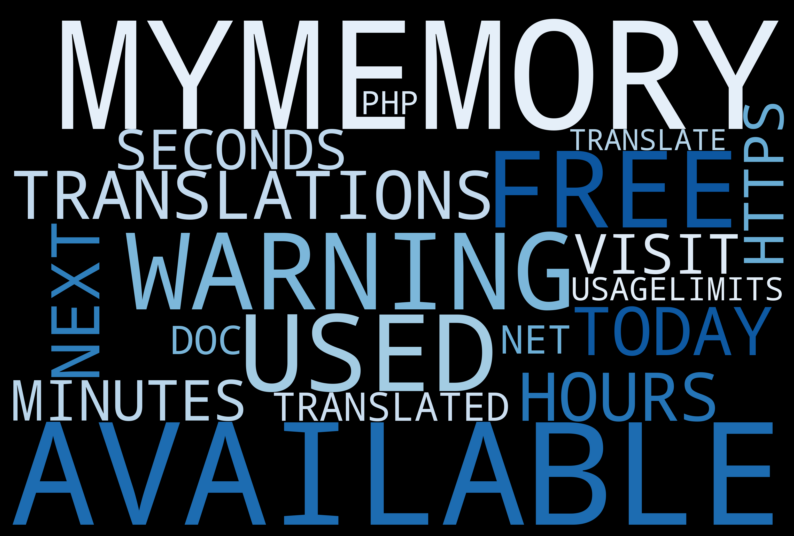

In [62]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=  (10, 8))
    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.axis('off')
    plt.show()
    
all_words = ' '.join([tweet for tweets in data['full_text']])

wordcloud = WordCloud(
    width= 3000,
    height= 2000,
    random_state = 3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords= STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

6. Klasifikasi sentimen

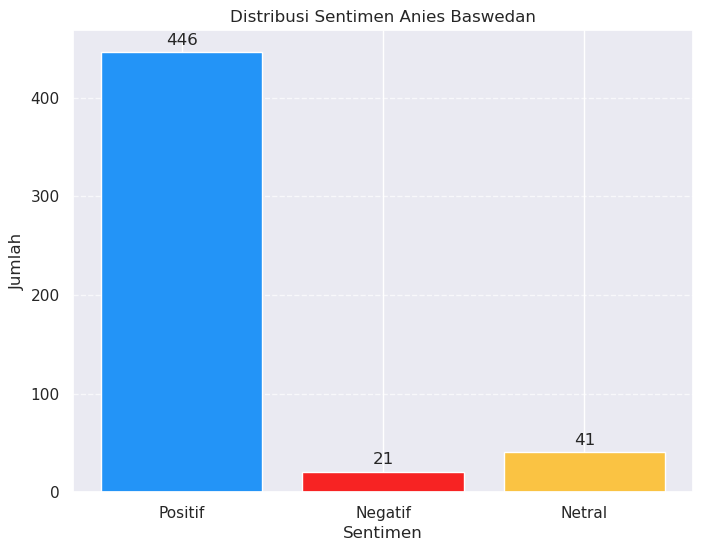

In [64]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])
    
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy = (bar.get_x()+ bar.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom'
                    
                    )
    ax.grid(axis='y', linestyle = '--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()
    
show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")

In [65]:
data

,full_text,tweet_english,klasifikasi
0,pasti anis punya prestasi,anis must have achievements,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif
...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
504,makanya susah paham apa disampaikam anies basw...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


In [66]:
dataset = data.drop(['full_text'], axis=1, inplace = False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [68]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if (n[1] == 'Positif'):
        set_positif.append(n)
    elif (n[1]== 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)
        

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)
    
    

In [69]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.8149606299212598


In [70]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet,classifier=cl)
    polaritas += analysis.polarity
    
    if analysis.classify() == 'Positif':
        total_positif += 1
        
    elif analysis.classify() == 'Netral':
        total_netral += 1
        
    else :
        total_negatif += 1
        
    
    status.append(analysis.classify())    
    total += 1
    
print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data : {total}")

Hasil Analisis Data:
Positif = 365
Netral = 133
Negatif = 10

Total Data : 508


In [71]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

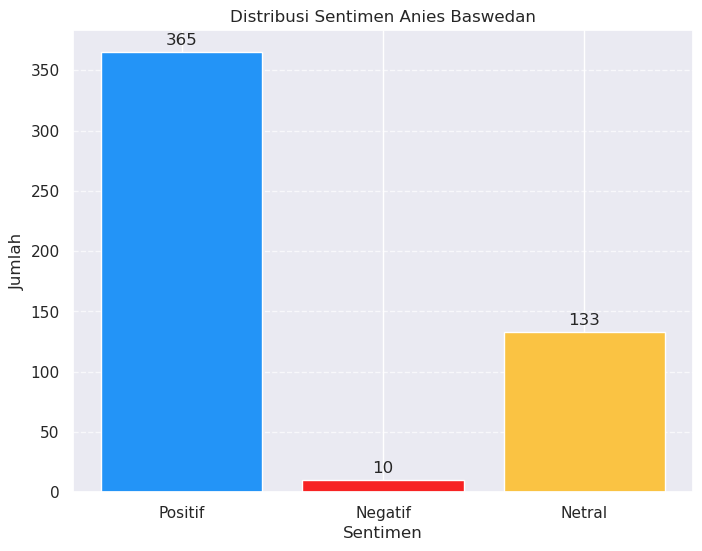

In [72]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])
    
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy = (bar.get_x()+ bar.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom'
                    
                    )
    ax.grid(axis='y', linestyle = '--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()
    
show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")

In [73]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,pasti anis punya prestasi,anis must have achievements,Netral,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif,Netral
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif,Netral
...,...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
504,makanya susah paham apa disampaikam anies basw...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [76]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text : {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
        print("Tuple tidak memiliki cukup elemen")

Text : suasana desa memang selalu senang udara segar rimbun tumbuh hijau sungai jernih penuh ikanikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
Classifier: Positif
Classifier Bayes: Netral 

Text : bicara sesuai fakta anies lantang sebut lampung punya alat pantau polusi udara gaco anies gempa daesang pagi batter up 100m views pilih baik
Classifier: Positif
Classifier Bayes: Netral 

Text : prabowo sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik
Classifier: Positif
Classifier Bayes: Netral 

Text : alesan jelas pak anies jelas jelas jelas nyamasih engga pahamdungu arti
Classifier: Positif
Classifier Bayes: Netral 

Text : wow mantap sekali ini arti bro anies jadi presiden ri
Classifier: Positif
Classifier Bayes: Netral 

Text : dulu ajar majas kelas 8 smpsaya paham apa bilang pak anies kalo ga paham mungkin kenyam kelas 8
Classifier: Positif
Classifier Bayes: Netral 

Text 